Dataset : Soccer Database

### Questions :
    - What teams are on the top at all seasons? in primer league and spanish league ?
        -- by answering this question, we can study this teams and know why they stayed in the top.
        
        how answering:
          -- - merge the tables of teams and sesons and add new features to make the top that has more win games  
            
        
    - What teams improved over all the seasons by achieve more wins ?
        -- by answering this question,by studying this teams we will know what attripute that make.
        
        how answering:
        -- - merge the tables of teams and sesons and add new features to make the top that has more win games 
        
                a big progress in a littel time 
    - focous in some teams to see how improve in all seasons
        -- chose some teams and look how the performance in the seasons.
        
         how answering:
         -- - merge the tables of teams and sesons and add new features to make the top that has more win games 
             and look at specific team with some tricks in merging.
        

### Documentation of any data wrangling :
    - drop little null values
    - most of null values fill by the mean of the column
    - drop most of match table,because this columns to the answer the questions
    - change some data types
    - add 'hom_winner'	'away_winner'	'Draw' to match column to know who team win.
    - add new feature to legue_match table columns 'win' by 'hom win' + 'away win' columns

In [2]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# connect to the database 
conn = sql.connect('database.sqlite')

## wrangling the data

- Gathring
- assess
- clean 

### Gathring
- read tables
- join some of tables

#### read tables

In [4]:
#read tables,  
country = pd.read_sql('SELECT * FROM Country', conn)
match = pd.read_sql('SELECT * FROM Match', conn)
player = pd.read_sql('SELECT * FROM Player', conn)
league = pd.read_sql('SELECT * FROM League', conn)
player_Attributes = pd.read_sql('SELECT * FROM Player_Attributes', conn)
team = pd.read_sql('SELECT * FROM Team', conn)
Team_Attributes = pd.read_sql('SELECT * FROM Team_Attributes', conn)

In [5]:
team = pd.read_sql('SELECT * FROM Team', conn)

In [6]:
match = pd.read_sql('SELECT * FROM Match', conn)

#### join tables

In [7]:
### i prefer use joins as we need 

### assess

In [8]:
# all tables to essey analysis
All = [country,match,player,player_Attributes,league,team,Team_Attributes]
nuns = ['country','match','player','player_Attributes','league','team','Team_Attributes']


In [9]:
# print the shape
for name,value in zip(nuns,All):
    print('the shape of ' + str(name) + ' is :' + str(value.shape) )

the shape of country is :(11, 2)
the shape of match is :(25979, 115)
the shape of player is :(11060, 7)
the shape of player_Attributes is :(183978, 42)
the shape of league is :(11, 3)
the shape of team is :(299, 5)
the shape of Team_Attributes is :(1458, 25)


 alot of features in match and player_Attributes tables, we may drob almost of this columns 

In [10]:
for name,value in zip(nuns,All):
    print(name)
    print( str(value.isnull().sum()) )
    print('---------------')

country
id      0
name    0
dtype: int64
---------------
match
id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64
---------------
player
id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64
---------------
player_Attributes
id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_

we have nulls values, like match tables in some columns

In [11]:
match.dtypes

id              int64
country_id      int64
league_id       int64
season         object
stage           int64
               ...   
GBD           float64
GBA           float64
BSH           float64
BSD           float64
BSA           float64
Length: 115, dtype: object

In [12]:
match.date.dtype

dtype('O')

data is an object type..!

In [13]:
nuns

['country',
 'match',
 'player',
 'player_Attributes',
 'league',
 'team',
 'Team_Attributes']

In [14]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [15]:
player.dtypes

id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object

birthday not in date types

In [16]:
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [17]:
player_Attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [18]:
player_Attributes.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

date column is not in date type

In [19]:
# match and player_attributes have alot of features .! 
pd.set_option('display.max_columns', None)

In [20]:
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


we only need in our analysis to little columns

### cleaning
- drop some columns
- data types
- null values
- add features



In [21]:
# some columns not important to incloud in our analysis 
mathDropList = match.columns[11:]

In [22]:
match.drop(mathDropList,axis=1,inplace=True)

In [23]:
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [24]:
match.shape

(25979, 11)

- data types

In [25]:
# date type and make it index
match['date'] = pd.to_datetime(match.date)
match.set_index('date', inplace=True)

In [26]:
player_Attributes['date'] = pd.to_datetime(player_Attributes['date'])
player_Attributes.set_index('date', inplace=True)

In [27]:
match.head()

,id,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
date,,,,,,,,,,
2008-08-17,1,1,1,2008/2009,1,492473,9987,9993,1,1
2008-08-16,2,1,1,2008/2009,1,492474,10000,9994,0,0
2008-08-16,3,1,1,2008/2009,1,492475,9984,8635,0,3
2008-08-17,4,1,1,2008/2009,1,492476,9991,9998,5,0
2008-08-16,5,1,1,2008/2009,1,492477,7947,9985,1,3


In [28]:
player_Attributes.head()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-18,1,218353,505942,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2015-11-19,2,218353,505942,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2015-09-21,3,218353,505942,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
2015-03-20,4,218353,505942,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
2007-02-22,5,218353,505942,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [29]:
# catagorical variables
player_attu = ['preferred_foot','defensive_work_rate','attacking_work_rate']

In [30]:
# catagorical types
player_Attributes[player_attu] = player_Attributes[player_attu].astype('category')


In [31]:
player_Attributes.dtypes

id                        int64
player_fifa_api_id        int64
player_api_id             int64
overall_rating          float64
potential               float64
preferred_foot         category
attacking_work_rate    category
defensive_work_rate    category
crossing                float64
finishing               float64
heading_accuracy        float64
short_passing           float64
volleys                 float64
dribbling               float64
curve                   float64
free_kick_accuracy      float64
long_passing            float64
ball_control            float64
acceleration            float64
sprint_speed            float64
agility                 float64
reactions               float64
balance                 float64
shot_power              float64
jumping                 float64
stamina                 float64
strength                float64
long_shots              float64
aggression              float64
interceptions           float64
positioning             float64
vision  

In [32]:
# catagorical variables
team_attripute_cat = ['buildUpPlaySpeedClass','buildUpPlayDribblingClass','buildUpPlayPassingClass','buildUpPlayPositioningClass','chanceCreationPassingClass','chanceCreationCrossingClass','chanceCreationShootingClass','chanceCreationPositioningClass','defencePressureClass',
                     'defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass']

In [33]:
Team_Attributes[team_attripute_cat] = Team_Attributes[team_attripute_cat].astype('category')

In [34]:
Team_Attributes.dtypes

id                                   int64
team_fifa_api_id                     int64
team_api_id                          int64
date                                object
buildUpPlaySpeed                     int64
buildUpPlaySpeedClass             category
buildUpPlayDribbling               float64
buildUpPlayDribblingClass         category
buildUpPlayPassing                   int64
buildUpPlayPassingClass           category
buildUpPlayPositioningClass       category
chanceCreationPassing                int64
chanceCreationPassingClass        category
chanceCreationCrossing               int64
chanceCreationCrossingClass       category
chanceCreationShooting               int64
chanceCreationShootingClass       category
chanceCreationPositioningClass    category
defencePressure                      int64
defencePressureClass              category
defenceAggression                    int64
defenceAggressionClass            category
defenceTeamWidth                     int64
defenceTeam

#### null values 

In [35]:
def nullMean(df,column):
    
    '''
    paremetre: DataFrame,column
    return : fill the null values with the mean of the column
    '''

    mean_value=df[column].mean()
  
    # Replace NaNs in column with mean
    # mean of values in the same column
    df[column].fillna(value=mean_value, inplace=True)

In [36]:
# full NaN values with the mean to player_attribute table
hasNullList = player_Attributes.columns[4:]
hasNullList = list(hasNullList)
hasNullList.remove('preferred_foot') # only float or int 
hasNullList.remove('attacking_work_rate') # only float or int 
hasNullList.remove('defensive_work_rate') # only float or int 
for i in hasNullList:
    nullMean(player_Attributes,i)

In [37]:
player_Attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
overall_rating          836
potential                 0
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                   0
dribbling                 0
curve                     0
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                   0
reactions                 0
balance                   0
shot_power                0
jumping                   0
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                    0
penalties                 0
marking                   0
standing_tackle           0
sliding_tackle      

In [38]:
# prefer to drop NaN values becaous if we don't know the prefered leg then we don't know the player .!
player_Attributes.dropna(subset=['preferred_foot'], inplace=True)

In [39]:
# Team_table, fill nan with 0
team.dropna(subset=['team_fifa_api_id'], inplace=True)

In [40]:
team.isnull().sum()

id                  0
team_api_id         0
team_fifa_api_id    0
team_long_name      0
team_short_name     0
dtype: int64

now we have no nan values, 

### -  add features

In [41]:
# add Winner column to match table, to know who win the game..

In [42]:
match.head()

,id,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
date,,,,,,,,,,
2008-08-17,1,1,1,2008/2009,1,492473,9987,9993,1,1
2008-08-16,2,1,1,2008/2009,1,492474,10000,9994,0,0
2008-08-16,3,1,1,2008/2009,1,492475,9984,8635,0,3
2008-08-17,4,1,1,2008/2009,1,492476,9991,9998,5,0
2008-08-16,5,1,1,2008/2009,1,492477,7947,9985,1,3


In [43]:
match['hom_winner'] = match.home_team_goal > match.away_team_goal

In [44]:
match['away_winner'] = match.home_team_goal < match.away_team_goal

In [45]:
match['Draw'] = match.home_team_goal == match.away_team_goal

In [46]:
match['hom_winner'].head()

date
2008-08-17    False
2008-08-16    False
2008-08-16    False
2008-08-17     True
2008-08-16    False
Name: hom_winner, dtype: bool

### Exploratory data analysis

In [47]:
# my lovely part ^^ 

- What teams are on the top at all seasons? in primer league and spanish league ?

In [48]:
# join match with league
league_match = league.merge(match, on='country_id',suffixes=('_league','_match'))
league_match.head()

,id_league,country_id,name,id_match,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,hom_winner,away_winner,Draw
0,1,1,Belgium Jupiler League,1,1,2008/2009,1,492473,9987,9993,1,1,False,False,True
1,1,1,Belgium Jupiler League,2,1,2008/2009,1,492474,10000,9994,0,0,False,False,True
2,1,1,Belgium Jupiler League,3,1,2008/2009,1,492475,9984,8635,0,3,False,True,False
3,1,1,Belgium Jupiler League,4,1,2008/2009,1,492476,9991,9998,5,0,True,False,False
4,1,1,Belgium Jupiler League,5,1,2008/2009,1,492477,7947,9985,1,3,False,True,False


In [49]:
league_match.shape

(25979, 15)

In [50]:
def season_from_league_match_table(season,league_name):
    
    
    '''
    parameter: season,league_name
    return: table of the season with the name of teams
    '''
    
    
    #get league id
    x = league[league['name'] == league_name]['country_id']
    league_id = x.iloc[0]
    
    
    #get home matches
    home = league_match[(league_match['season'] ==season) & (league_match['league_id'] == league_id)] \
            .groupby(['home_team_api_id'])['hom_winner'].sum().reset_index()
    
    #get away matches
    away = league_match[(league_match['season'] ==season) & (league_match['league_id'] == league_id)] \
            .groupby(['away_team_api_id'])['away_winner'].sum().reset_index()
    
    #merge results
    df = home.merge(away,left_on='home_team_api_id',\
                              right_on='away_team_api_id')
    
    
    # new features, win 
    df['win'] = home['hom_winner'] + away['away_winner']
    
    # get names of teams
    df_final = df.merge(team,how='left',left_on='home_team_api_id',right_on='team_api_id')
    return df_final

- preimier league

In [51]:
# for primer league
seasons_primer = league_match.season.unique()


In [52]:
seasons_primer

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

In [53]:
league.name

0       Belgium Jupiler League
1       England Premier League
2               France Ligue 1
3        Germany 1. Bundesliga
4                Italy Serie A
5       Netherlands Eredivisie
6           Poland Ekstraklasa
7     Portugal Liga ZON Sagres
8      Scotland Premier League
9              Spain LIGA BBVA
10    Switzerland Super League
Name: name, dtype: object

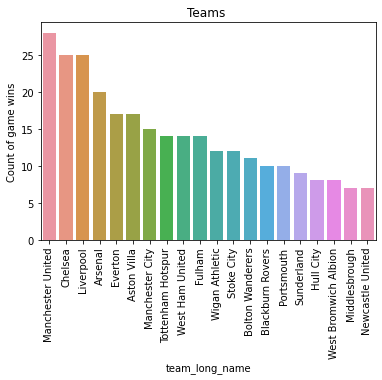

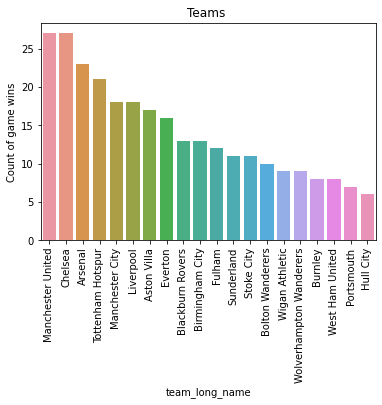

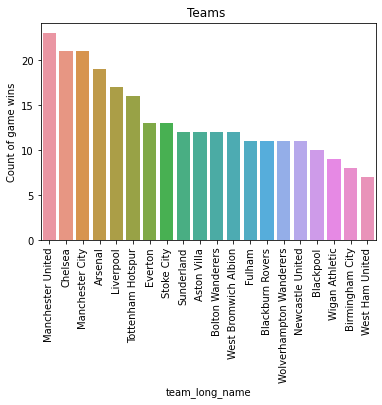

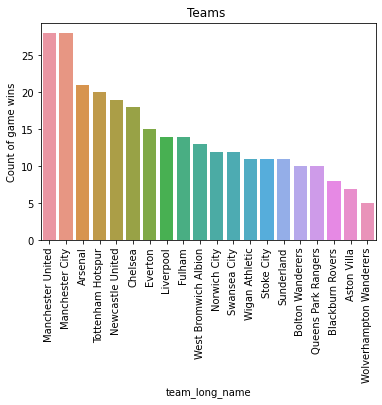

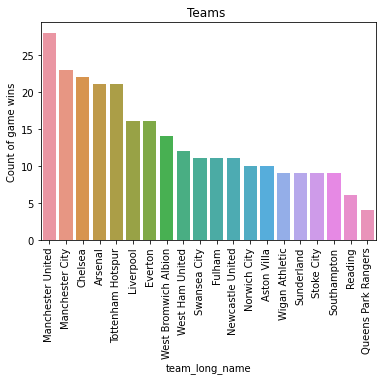

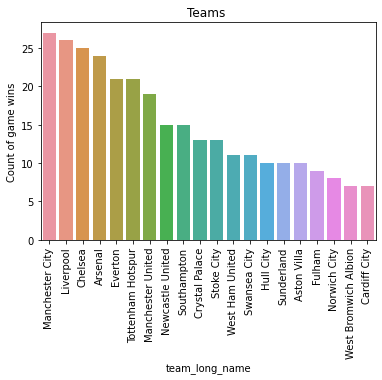

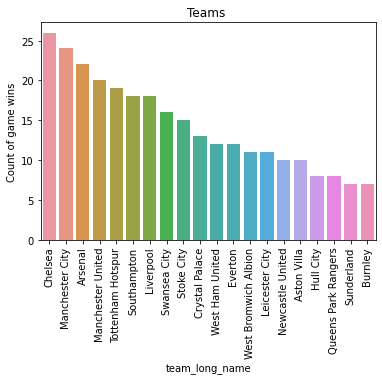

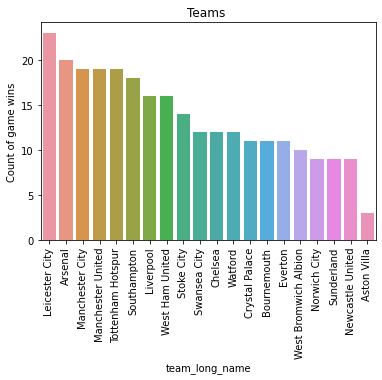

In [54]:
for season in seasons_primer:
   # print(season.index)
    df = season_from_league_match_table(season,'England Premier League').sort_values('win',ascending=False)
    
    #fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    ax = sns.barplot(x='team_long_name',y='win',\
            data=df)
    plt.xticks(rotation=90)
    
    
    ax.set(
       ylabel='Count of game wins',
       title='Teams ')
    
    
    plt.show()
    
    

some tems like manchester united and chelsea stay at the top, we can study them, teams like leiceter City achive big progress we can study it to know the reasons

- spanich league

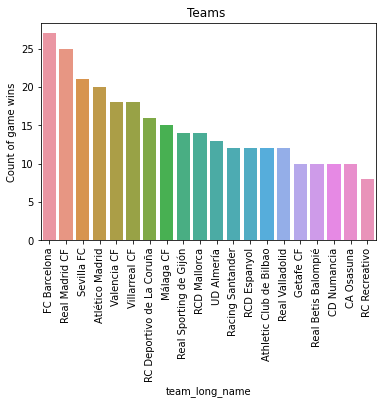

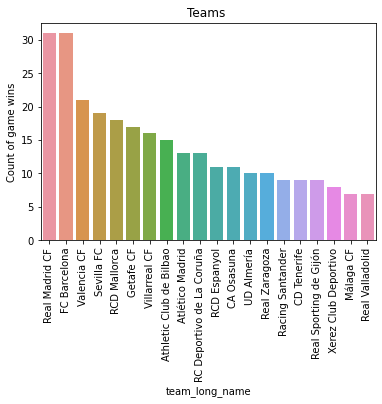

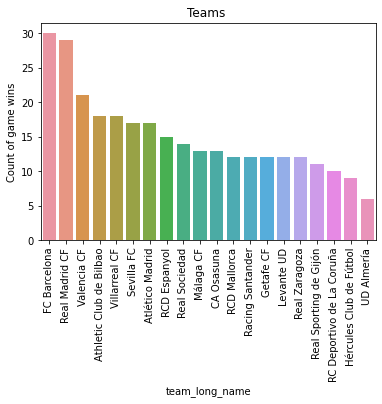

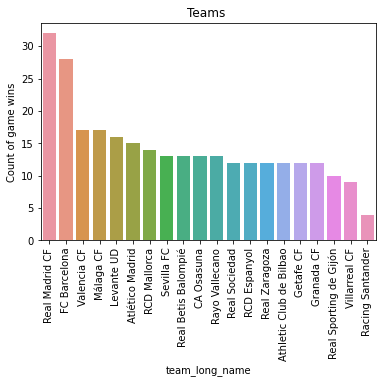

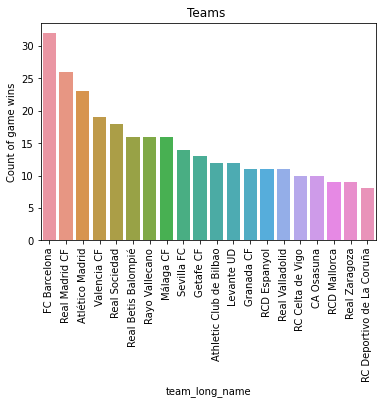

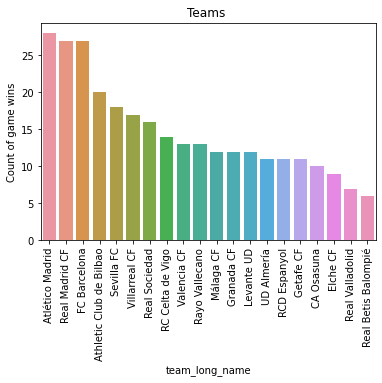

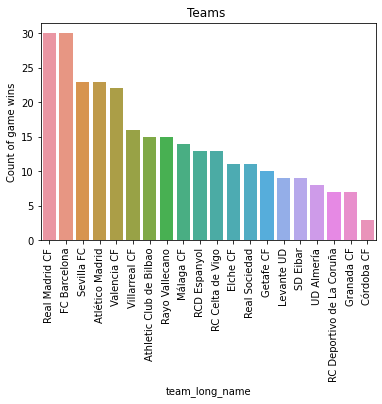

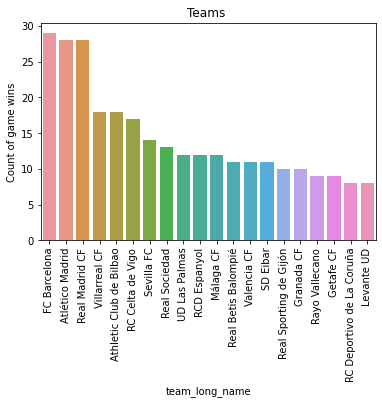

In [55]:
for season in seasons_primer:
   # print(season.index)
    df = season_from_league_match_table(season,'Spain LIGA BBVA').sort_values('win',ascending=False)
    
    #fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    ax = sns.barplot(x='team_long_name',y='win',\
            data=df)
    plt.xticks(rotation=90)
    
    
    ax.set(ylabel='Count of game wins',
        title='Teams ')
    
    
    plt.show()

some tems like real madrid stay at the top, we can study them, teams like Valiencia achive big progress we can study it to know the reasons

- What teams improved over all the seasons by achieve more wins ? 

In [56]:
league_match.head()

,id_league,country_id,name,id_match,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,hom_winner,away_winner,Draw
0,1,1,Belgium Jupiler League,1,1,2008/2009,1,492473,9987,9993,1,1,False,False,True
1,1,1,Belgium Jupiler League,2,1,2008/2009,1,492474,10000,9994,0,0,False,False,True
2,1,1,Belgium Jupiler League,3,1,2008/2009,1,492475,9984,8635,0,3,False,True,False
3,1,1,Belgium Jupiler League,4,1,2008/2009,1,492476,9991,9998,5,0,True,False,False
4,1,1,Belgium Jupiler League,5,1,2008/2009,1,492477,7947,9985,1,3,False,True,False


In [57]:

def seasons_tables(league_name):
    '''
    return : all seasons and number of wins to teams and name of teams for a specific league
    
    
    
    '''
    
    
     #get league id
    x = league[league['name'] == league_name]['country_id']
    league_id = x.iloc[0]
    
    
    
    #get home matches
    home = league_match[league_match['league_id'] == league_id] \
            .groupby(['season','home_team_api_id'])['hom_winner'].sum().reset_index()
    
    #get away matches
    away = league_match[league_match['league_id'] == league_id] \
            .groupby(['season','away_team_api_id'])['away_winner'].sum().reset_index()
    
    
    # new features
    home['win'] = home['hom_winner'] + away['away_winner']
    
  
    
    # get names of teams
    df_final = home.merge(team,how='left',left_on='home_team_api_id',right_on='team_api_id')
    return df_final

##### in England Premier League

In [58]:
premier_league_seasons = seasons_tables('England Premier League')

In [59]:
premier_league_seasons.head(10).sort_values('win',ascending=False)

,season,home_team_api_id,hom_winner,win,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,2008/2009,8455,11,25,3475,8455,5.0,Chelsea,CHE
8,2008/2009,8650,12,25,3462,8650,9.0,Liverpool,LIV
1,2008/2009,8456,13,15,3466,8456,10.0,Manchester City,MCI
7,2008/2009,8586,10,14,3470,8586,18.0,Tottenham Hotspur,TOT
9,2008/2009,8654,9,14,3463,8654,19.0,West Ham United,WHU
4,2008/2009,8528,8,12,3464,8528,1917.0,Wigan Athletic,WIG
6,2008/2009,8559,7,11,3471,8559,4.0,Bolton Wanderers,BOL
2,2008/2009,8462,8,10,3476,8462,1790.0,Portsmouth,POR
3,2008/2009,8472,6,9,3461,8472,106.0,Sunderland,SUN
5,2008/2009,8549,5,7,3469,8549,12.0,Middlesbrough,MID


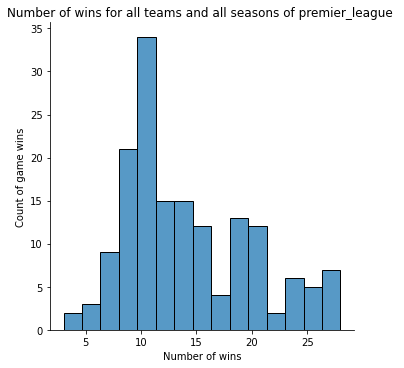

In [60]:
# number of wins 
ax = sns.displot(premier_league_seasons, x="win",bins=15)
ax.set(xlabel='Number of wins',
       ylabel='Count of game wins',
       title='Number of wins for all teams and all seasons of premier_league ')

most of teams wins only 10 games by a season

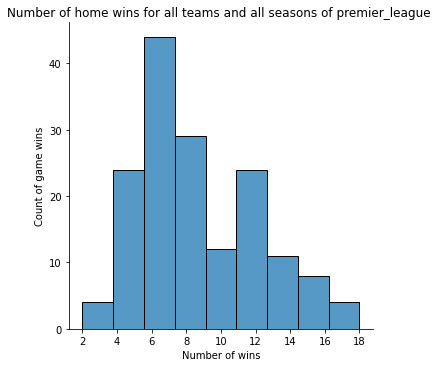

In [61]:
# number of wins 
ax = sns.displot(premier_league_seasons, x="hom_winner")
ax.set(xlabel='Number of wins',
       ylabel='Count of game wins',
       title='Number of home wins for all teams and all seasons of premier_league ')

the most of teams achieve the most of wins games in the home 

- the performance of Man city

In [62]:
city = premier_league_seasons[premier_league_seasons['team_short_name'] == 'MCI']

In [63]:
city.describe()

,home_team_api_id,hom_winner,win,id,team_api_id,team_fifa_api_id
count,8.0,8.000000,8.00000,8.0,8.0,8.0
mean,8456.0,14.125000,21.87500,3466.0,8456.0,10.0
std,0.0,2.232071,4.48609,0.0,0.0,0.0
min,8456.0,12.000000,15.00000,3466.0,8456.0,10.0
25%,8456.0,12.750000,18.75000,3466.0,8456.0,10.0
50%,8456.0,13.500000,22.00000,3466.0,8456.0,10.0
75%,8456.0,14.750000,24.75000,3466.0,8456.0,10.0
max,8456.0,18.000000,28.00000,3466.0,8456.0,10.0


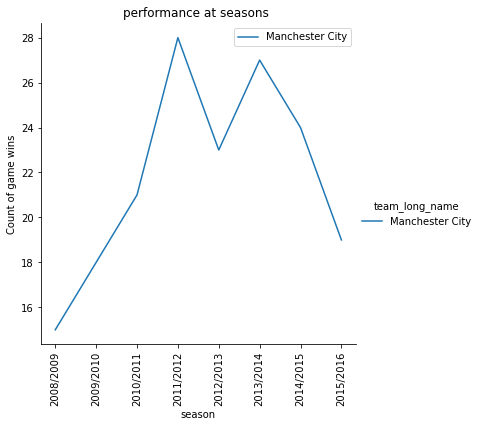

In [64]:
ax = sns.relplot(x="season", y="win",
data=city,
kind="line",
hue="team_long_name")
plt.xticks(rotation=90)


ax.set(
       ylabel='Count of game wins',
       title='performance at seasons ')

plt.legend()

plt.show()

Man city make a big progress between 2008 to 2011 sesons

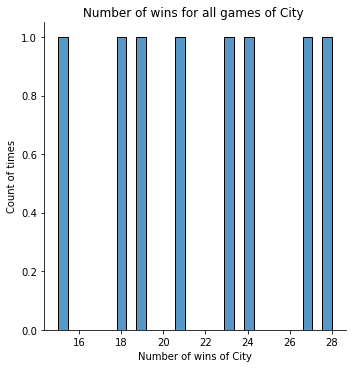

In [65]:
# number of wins 
ax = sns.displot(city, x="win",bins=28)
ax.set(xlabel='Number of wins of City',
       ylabel='Count of times',
       title='Number of wins for all games of City ')

improve in wins from 16 to 28 in little time

In [66]:
# test the plot
city['win'].value_counts()

18    1
19    1
21    1
23    1
24    1
27    1
28    1
15    1
Name: win, dtype: int64

that values say that the plot was true

- the performance of arsenal

In [67]:
arsenal = premier_league_seasons[premier_league_seasons['team_short_name'] == 'ARS']

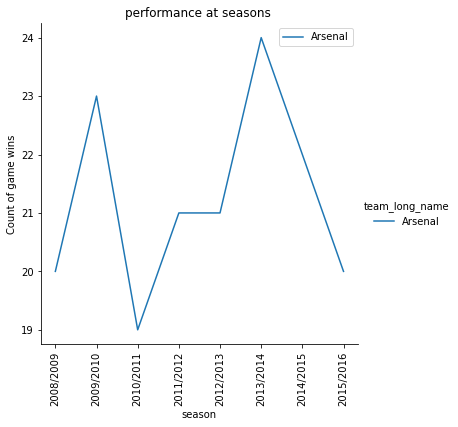

In [68]:
ax = sns.relplot(x="season", y="win",
data=arsenal,
kind="line",
hue="team_long_name")
plt.xticks(rotation=90)

ax.set(
       ylabel='Count of game wins',
       title='performance at seasons ')

plt.legend()

plt.show()

arsenal make big drop from 2014 and 2016 seasons, and big progress from 2011 to 2014 seasons

- the improvement of Tottenham

In [69]:
Tottenham = premier_league_seasons[premier_league_seasons['team_short_name'] == 'TOT']

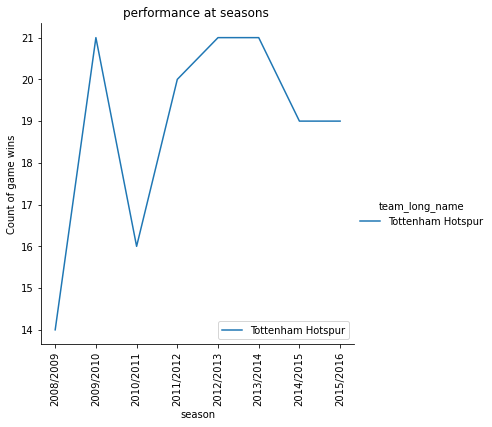

In [70]:
ax = sns.relplot(x="season", y="win",
data=Tottenham,
kind="line",
hue="team_long_name")
plt.xticks(rotation=90)

ax.set(
       ylabel='Count of game wins',
       title='performance at seasons ')

plt.legend()

plt.show()

Tottenham played will the last tow season and make some stability

In [71]:
premier_league_seasons[premier_league_seasons['team_long_name'] == 'Leicester City']

,season,home_team_api_id,hom_winner,win,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
121,2014/2015,8197,7,11,8021,8197,95.0,Leicester City,LEI
140,2015/2016,8197,12,23,8021,8197,95.0,Leicester City,LEI


- the development of Leicester City

In [72]:
# Leicester City
Leicester = premier_league_seasons[premier_league_seasons['team_short_name'] == 'LEI']

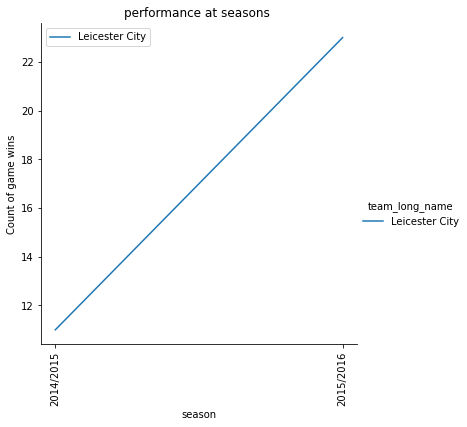

In [73]:
ax = sns.relplot(x="season", y="win",
data=Leicester,
kind="line",
hue="team_long_name")
plt.xticks(rotation=90)

ax.set(
       ylabel='Count of game wins',
       title='performance at seasons ')

plt.legend()

plt.show()

Leicester City make a big progress from 2015 to 2016 seasons

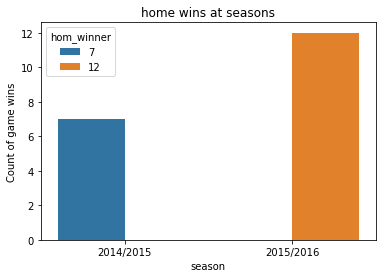

In [74]:
#Univariate analysis
#Leicester['win'].plot(kind='bar')
ax = sns.barplot(x="season", y="hom_winner",hue='hom_winner', data=Leicester)
ax.set(
       ylabel='Count of game wins',
       title='home wins at seasons')
plt.show()

Leicester City in 2016 wins more in the home

In [75]:
Leicester.head()

,season,home_team_api_id,hom_winner,win,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
121,2014/2015,8197,7,11,8021,8197,95.0,Leicester City,LEI
140,2015/2016,8197,12,23,8021,8197,95.0,Leicester City,LEI


- Bundesliga

In [76]:
Bundesliga = seasons_tables('Germany 1. Bundesliga')

In [77]:
Bundesliga.head(20)

,season,home_team_api_id,hom_winner,win,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,2008/2009,8177,12,19,15626,8177,166.0,Hertha BSC Berlin,HBE
1,2008/2009,8178,6,14,15619,8178,32.0,Bayer 04 Leverkusen,LEV
2,2008/2009,8226,9,15,15630,8226,10029.0,TSG 1899 Hoffenheim,HOF
3,2008/2009,8295,5,8,15633,8295,1832.0,Karlsruher SC,KAR
4,2008/2009,8398,6,8,15629,8398,162.0,FC Energie Cottbus,COT
5,2008/2009,8697,10,12,15628,8697,38.0,SV Werder Bremen,WBR
6,2008/2009,8721,16,21,15623,8721,175.0,VfL Wolfsburg,WOL
7,2008/2009,8722,4,11,15624,8722,31.0,1. FC Köln,FCK
8,2008/2009,9788,5,8,15631,9788,23.0,Borussia Mönchengladbach,GLA
9,2008/2009,9789,8,15,15620,9789,22.0,Borussia Dortmund,DOR


- Borussia Dortmund & FC Bayern Munich	

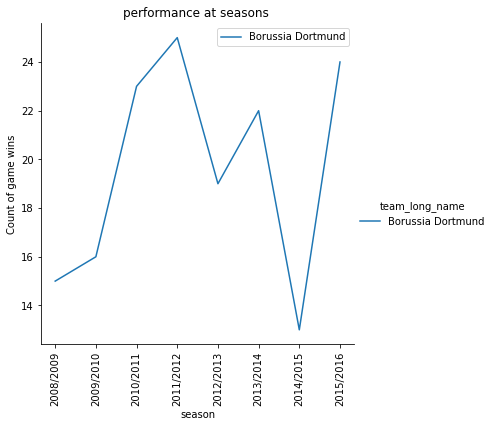

In [78]:

Dortmund = Bundesliga[Bundesliga['team_short_name'] == 'DOR']

ax=sns.relplot(x="season", y="win",
data=Dortmund,
kind="line",
hue="team_long_name")
plt.xticks(rotation=90)

ax.set(
       ylabel='Count of game wins',
       title='performance at seasons ')
plt.legend()

plt.show()

Borussia Dortmund from high to the middle in all sesons .!

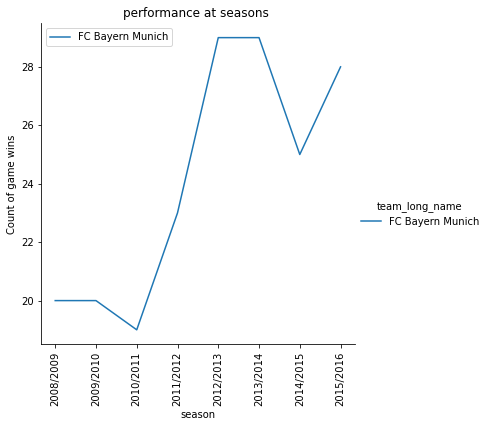

In [79]:

Bayern = Bundesliga[Bundesliga['team_short_name'] == 'BMU']

ax=sns.relplot(x="season", y="win",
data=Bayern,
kind="line",
hue="team_long_name")
plt.xticks(rotation=90)

ax.set(
       ylabel='Count of game wins',
       title='performance at seasons ')

plt.legend()

plt.show()

FC Bayern Munich in the right way by make more wins 

### Conclusions Phase



- Leicester City make a big progress in seasons 2014/2015 and 2015/2016

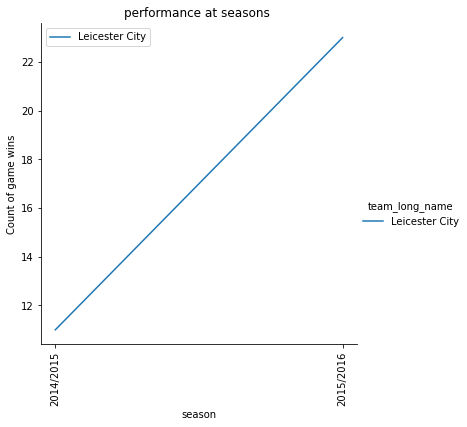

In [80]:
Leicester = premier_league_seasons[premier_league_seasons['team_long_name'] == 'Leicester City']
ax = sns.relplot(x="season", y="win",
data=Leicester,
kind="line",
hue="team_long_name")
plt.xticks(rotation=90)

ax.set(
       ylabel='Count of game wins',
       title='performance at seasons ')
plt.legend()

plt.show()

- real madrid in the top of achieving more than 25 wins at season 

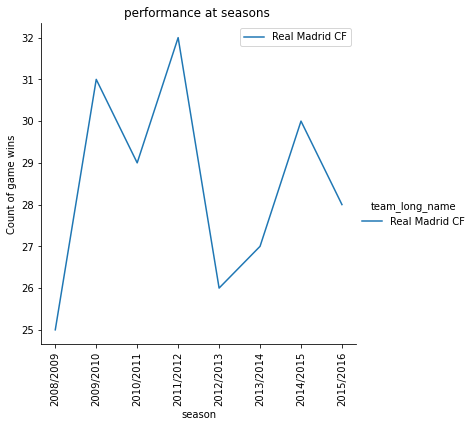

In [81]:
spanich = seasons_tables('Spain LIGA BBVA')


madrid = spanich[spanich['team_short_name'] == 'REA']




ax = sns.relplot(x="season", y="win",
data=madrid,
kind="line",
hue="team_long_name")
plt.xticks(rotation=90)

ax.set(
       ylabel='Count of game wins',
       title='performance at seasons ')


plt.legend()


plt.show()

real madrid in the top of achieving more than 25 wins at season 

- Manchester United lived a historical era 

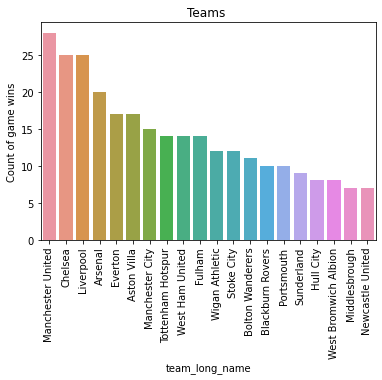

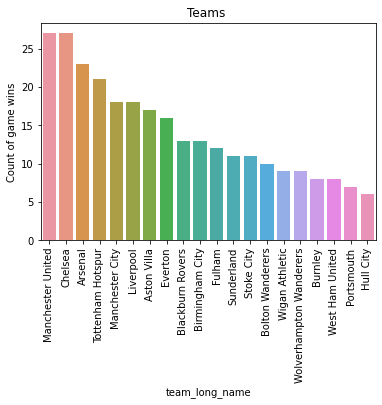

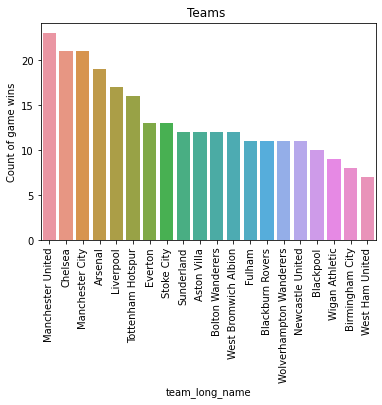

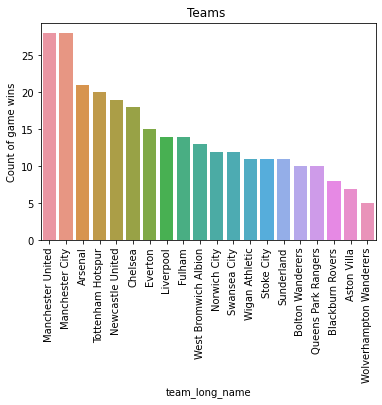

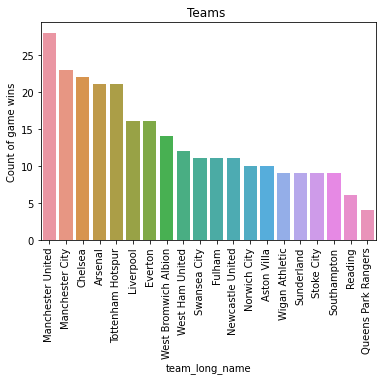

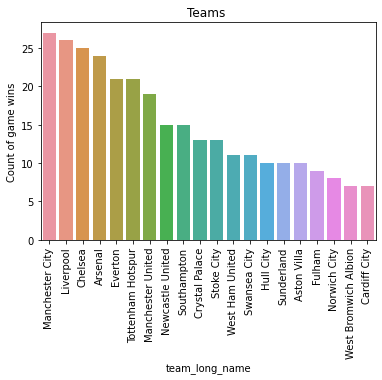

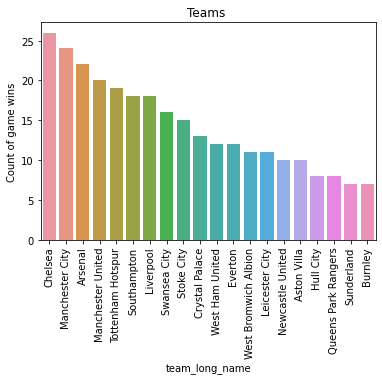

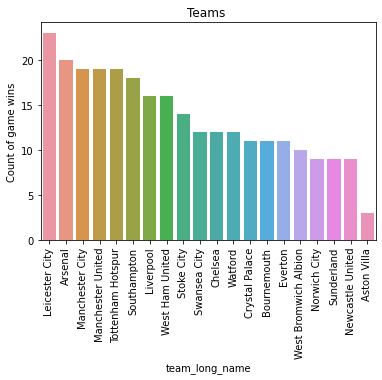

In [82]:
for season in seasons_primer:
   # print(season.index)
    df = season_from_league_match_table(season,'England Premier League').sort_values('win',ascending=False)
    
    #fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    ax = sns.barplot(x='team_long_name',y='win',\
            data=df)
    plt.xticks(rotation=90)
    
    
    ax.set(
       ylabel='Count of game wins',
       title='Teams ')
    
    
    plt.show()

Manchester United stay in the top of the table for 5 seasons .!

- Spain LIGA has only three clubs in the top and the most only Tow 

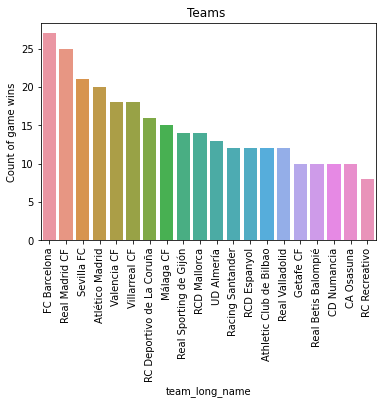

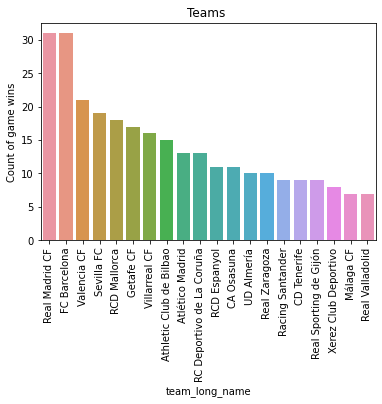

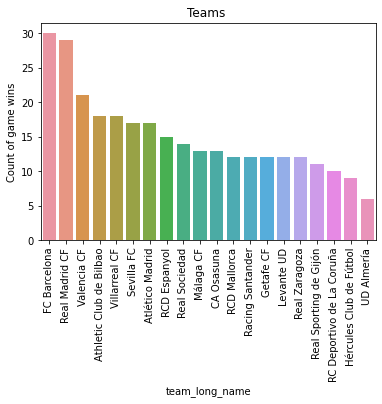

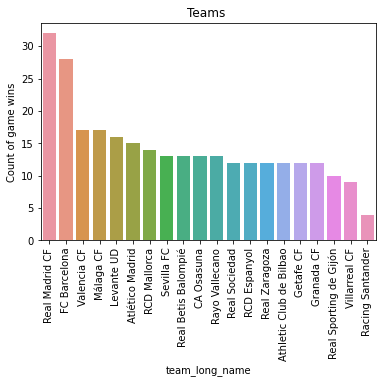

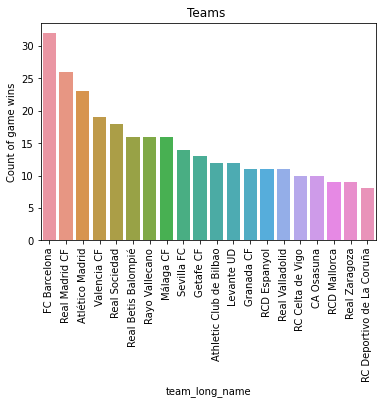

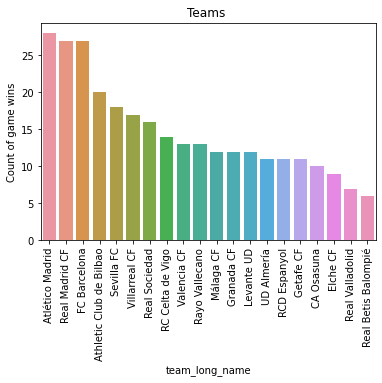

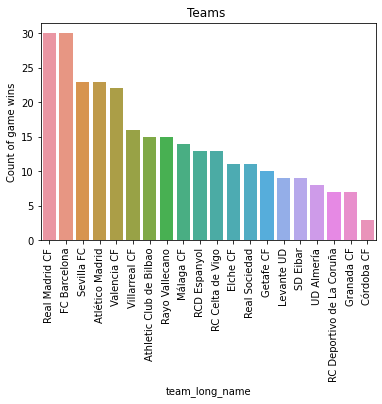

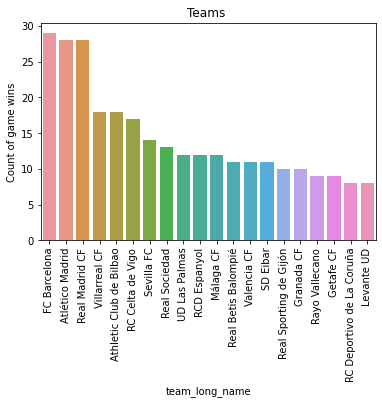

In [83]:
for season in seasons_primer:
   # print(season.index)
    df = season_from_league_match_table(season,'Spain LIGA BBVA').sort_values('win',ascending=False)
    
    #fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    ax = sns.barplot(x='team_long_name',y='win',\
            data=df)
    plt.xticks(rotation=90)
    
    
    ax.set(ylabel='Count of game wins',
        title='Teams ')
    
    
    plt.show()

Barcelona & real madrid at the top in the most seasons

### Limitations :
    - if i know the price of players may go more deep in analysis
    - if i know the salary of players may go more deep in analysis 
    - in my analysis i deeped in some parts have no limitations